# Problem Statement:
Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

**Attribute Information:**

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

# importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_curve,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# Examining the Data

In [2]:
temp = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")
temp.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
temp.shape

(7752, 25)

there are 7752 rows & 25 columns are present in the data set

In [4]:
temp.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

So except Date column all columns are float data types

In [5]:
temp.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

There are 25 columns are present in the data set

In [6]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


So there are some missing data is present.

In [7]:
temp.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

lets check through heatmap

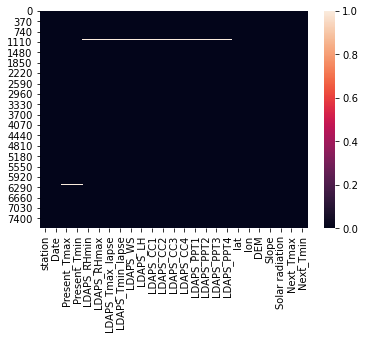

In [8]:
sns.heatmap(temp.isnull())
plt.show()

In [9]:
temp["station"].value_counts

<bound method IndexOpsMixin.value_counts of 0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
        ... 
7747    23.0
7748    24.0
7749    25.0
7750     NaN
7751     NaN
Name: station, Length: 7752, dtype: float64>

In [10]:
temp.mean()

station               13.000000
Present_Tmax          29.768211
Present_Tmin          23.225059
LDAPS_RHmin           56.759372
LDAPS_RHmax           88.374804
LDAPS_Tmax_lapse      29.613447
LDAPS_Tmin_lapse      23.512589
LDAPS_WS               7.097875
LDAPS_LH              62.505019
LDAPS_CC1              0.368774
LDAPS_CC2              0.356080
LDAPS_CC3              0.318404
LDAPS_CC4              0.299191
LDAPS_PPT1             0.591995
LDAPS_PPT2             0.485003
LDAPS_PPT3             0.278200
LDAPS_PPT4             0.269407
lat                   37.544722
lon                  126.991397
DEM                   61.867972
Slope                  1.257048
Solar radiation     5341.502803
Next_Tmax             30.274887
Next_Tmin             22.932220
dtype: float64

There are huge amount of data is missing in some columns

# Handling Missing Values

# All the Null values columns are replacing with mean values 

In [11]:
temp["station"]=temp["station"].fillna(temp["station"].mean())
temp["Present_Tmax"]=temp["Present_Tmax"].fillna(temp["Present_Tmax"].mean())
temp["Present_Tmin"]=temp["Present_Tmin"].fillna(temp["Present_Tmin"].mean())
temp["LDAPS_RHmin"]=temp["LDAPS_RHmin"].fillna(temp["LDAPS_RHmin"].mean())
temp["LDAPS_RHmax"]=temp["LDAPS_RHmax"].fillna(temp["LDAPS_RHmax"].mean())
temp["LDAPS_Tmax_lapse"]=temp["LDAPS_Tmax_lapse"].fillna(temp["LDAPS_Tmax_lapse"].mean())
temp["LDAPS_Tmin_lapse"]=temp["LDAPS_Tmin_lapse"].fillna(temp["LDAPS_Tmin_lapse"].mean())
temp["LDAPS_WS"]=temp["LDAPS_WS"].fillna(temp["LDAPS_WS"].mean())
temp["LDAPS_LH"]=temp["LDAPS_LH"].fillna(temp["LDAPS_LH"].mean())
temp["LDAPS_CC1"]=temp["LDAPS_CC1"].fillna(temp["LDAPS_CC1"].mean())
temp["LDAPS_CC2"]=temp["LDAPS_CC2"].fillna(temp["LDAPS_CC2"].mean())
temp["LDAPS_CC3"]=temp["LDAPS_CC3"].fillna(temp["LDAPS_CC3"].mean())
temp["LDAPS_CC4"]=temp["LDAPS_CC4"].fillna(temp["LDAPS_CC4"].mean())
temp["LDAPS_PPT1"]=temp["LDAPS_PPT1"].fillna(temp["LDAPS_PPT1"].mean())
temp["LDAPS_PPT2"]=temp["LDAPS_PPT2"].fillna(temp["LDAPS_PPT2"].mean())
temp["LDAPS_PPT3"]=temp["LDAPS_PPT3"].fillna(temp["LDAPS_PPT3"].mean())
temp["LDAPS_PPT4"]=temp["LDAPS_PPT4"].fillna(temp["LDAPS_PPT4"].mean())
temp["Next_Tmax"]=temp["Next_Tmax"].fillna(temp["Next_Tmax"].mean())
temp["Next_Tmin"]=temp["Next_Tmin"].fillna(temp["Next_Tmin"].mean())

In [12]:
temp.isnull().sum()

station             0
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

here there is no use of date column so dropping it from the data set

In [34]:
temp.drop(["Date"],axis=1,inplace=True)

<AxesSubplot:>

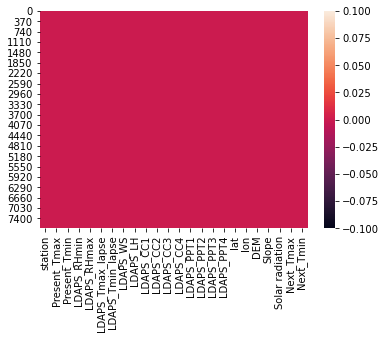

In [35]:
sns.heatmap(temp.isnull())

In [36]:
temp.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

Removed all Null data in the data set

# STATSTICS DATA

In [37]:
temp.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.210637,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,0.261185,...,1.754258,1.156174,1.200364,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,...,0.024276,0.009697,0.000693,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000



1 The mean is more than median 50% percentile in some columns.

2 There is a large difference in 75% percentile

3 The 1 and 2 observation suggest that there are extreme outliers present in these three columns.

In [72]:
temp.corr()

,station,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,-0.066733,-0.166984,0.069107,0.104758,0.005277,-0.133357,0.006919,0.003396,0.000694,...,-0.008250,-0.012461,-0.010401,-0.237502,-0.118704,-0.255830,-0.090061,-0.019001,0.107983,0.128293
LDAPS_RHmin,-0.066733,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,0.745443,0.689679,...,0.390967,0.240642,0.168595,0.087099,-0.076237,0.102115,0.123744,0.244080,-0.437898,0.095019
LDAPS_RHmax,-0.166984,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,0.391330,0.226957,...,0.229050,0.134607,0.117853,0.195798,0.025667,0.177168,0.219599,0.149261,-0.283738,-0.071997
LDAPS_Tmax_lapse,0.069107,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,-0.523619,-0.541327,...,-0.242122,-0.188115,-0.160273,-0.042093,0.090666,-0.178895,-0.162332,0.047971,0.827189,0.586868
LDAPS_Tmin_lapse,0.104758,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,0.047727,-0.044018,...,0.000870,-0.088575,-0.094655,-0.096257,-0.026701,-0.195455,-0.185849,0.159975,0.586983,0.880176
LDAPS_WS,0.005277,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,0.261090,0.242991,...,0.191886,0.161684,0.144085,0.036657,-0.059466,0.191053,0.171629,0.121759,-0.342729,-0.096576
LDAPS_LH,-0.133357,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,-0.264280,-0.245583,...,-0.077545,0.016102,0.019979,0.133221,0.025822,0.055133,0.086781,-0.047384,0.157616,-0.055440
LDAPS_CC1,0.006919,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,0.779683,0.517493,...,0.389453,0.168742,0.091722,-0.008131,-0.006843,-0.014090,-0.020752,0.218309,-0.452541,-0.011028
LDAPS_CC2,0.003396,0.745443,0.391330,-0.523619,0.047727,0.261090,-0.264280,0.779683,1.000000,0.725813,...,0.478472,0.240134,0.159548,-0.001497,-0.003581,-0.012823,-0.018073,0.170403,-0.490756,0.031250
LDAPS_CC3,0.000694,0.689679,0.226957,-0.541327,-0.044018,0.242991,-0.245583,0.517493,0.725813,1.000000,...,0.337569,0.339800,0.302357,0.004108,0.016041,0.000697,-0.003338,0.119292,-0.514680,-0.054726


<AxesSubplot:>

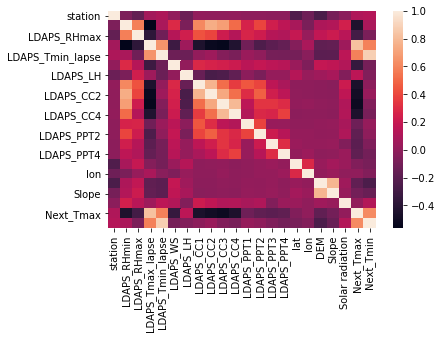

In [73]:
sns.heatmap(temp.corr())

# DATA VISUALIZATION

Checking Outliers for each columns

<AxesSubplot:>

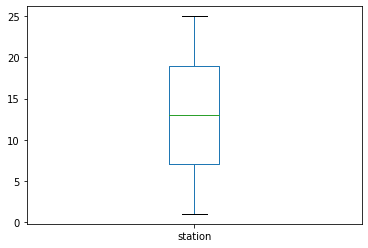

In [38]:
temp['station'].plot.box()

In this column Outliers are very low so can't find Outliers easily

<AxesSubplot:>

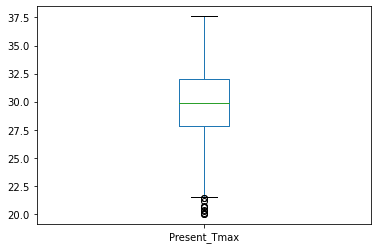

In [39]:
temp['Present_Tmax'].plot.box()

Here in this column we can find Outliers

<AxesSubplot:>

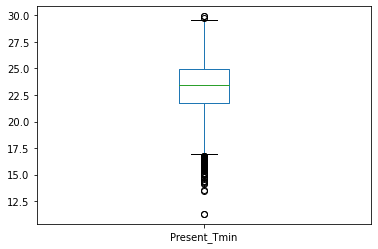

In [40]:
temp['Present_Tmin'].plot.box()

Here in this column we can find Outliers

<AxesSubplot:>

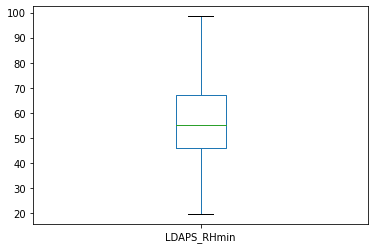

In [41]:
temp['LDAPS_RHmin'].plot.box()

In this column Outliers are very low so can't find Outliers easily

temp['lat'].plot.box()

<AxesSubplot:>

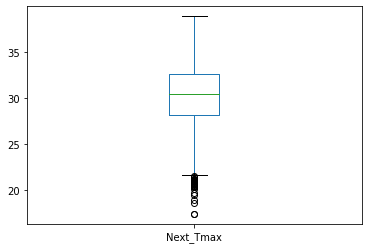

In [42]:
temp['Next_Tmax'].plot.box()

Outlier were visible for this column

<AxesSubplot:>

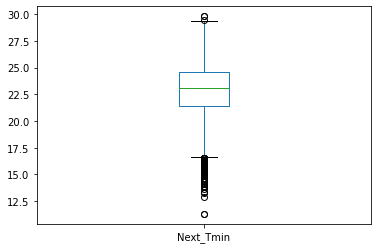

In [43]:
temp['Next_Tmin'].plot.box()

Outlier were visible for this column also

# Removing Outliers

In [44]:
from scipy.stats import zscore
z=np.abs(zscore(temp))
z

array([[1.6643153 , 0.36132577, 0.75952931, ..., 1.51793488, 0.37628214,
        0.6975993 ],
       [1.52562236, 0.72108401, 0.6762959 , ..., 1.22994952, 0.07209725,
        0.17406357],
       [1.38692941, 0.61960809, 0.03118815, ..., 1.21653443, 0.26425985,
        0.38974413],
       ...,
       [1.6643153 , 2.22171758, 2.42419767, ..., 2.0743251 , 0.79263444,
        2.2279345 ],
       [0.        , 3.30412736, 4.9628169 , ..., 2.35821196, 4.12345278,
        4.68452522],
       [0.        , 2.64912642, 2.77789093, ..., 1.51793488, 2.76237361,
        2.76579089]])

In [54]:
threshold=3
print(np.where(z>3))

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64), array([ 7, 14, 14, ..., 14, 15, 16], dtype=int64))


In [55]:
temp_new=temp[(z<3).all(axis=1)]
temp_new

,station,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [51]:
temp.drop('Present_Tmin',axis=1,inplace=True)

In [52]:
temp.drop('Present_Tmax',axis=1,inplace=True)

In [53]:
temp

,station,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,13.0,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


# StandardScaler Method

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaledX = scaler.fit_transform(temp)

In [62]:
scaledX

array([[-1.6643153 ,  0.10251523,  0.38307796, ...,  1.51793488,
        -0.37628214, -0.6975993 ],
       [-1.52562236, -0.30802721,  0.31158619, ...,  1.22994952,
         0.07209725, -0.17406357],
       [-1.38692941, -0.55281415, -0.61498177, ...,  1.21653443,
         0.26425985,  0.38974413],
       ...,
       [ 1.6643153 , -2.31750374, -1.55534234, ..., -2.0743251 ,
        -0.79263444, -2.2279345 ],
       [ 0.        , -2.5325175 , -4.11344274, ..., -2.35821196,
        -4.12345278, -4.68452522],
       [ 0.        ,  2.86141898,  1.62440928, ...,  1.51793488,
         2.76237361,  2.76579089]])

Here standardscaler values of scaledX

In [63]:
from sklearn.decomposition import PCA

testpca = PCA()
Y = testpca.fit(scaledX)

In [64]:
Y.explained_variance_ratio_

array([0.25262175, 0.13076621, 0.08784657, 0.06634815, 0.06196137,
       0.05291446, 0.04680015, 0.04269392, 0.03822682, 0.03661518,
       0.03185972, 0.02991004, 0.02848953, 0.02501616, 0.01730948,
       0.01252624, 0.0097295 , 0.00833353, 0.00662524, 0.00577757,
       0.00509781, 0.00253059])

In [65]:
var_cumu = np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 25.26217492,  38.33879575,  47.12345323,  53.75826841,
        59.95440568,  65.24585147,  69.92586615,  74.1952585 ,
        78.01794096,  81.6794589 ,  84.86543093,  87.85643541,
        90.70538871,  93.20700455,  94.93795248,  96.19057605,
        97.16352633,  97.99687927,  98.65940337,  99.23716054,
        99.74694147, 100.        ])

In [66]:
k = np.argmax(var_cumu>99)
print("Number of components explaining 99% variance:",k)

Number of components explaining 99% variance: 19


Number of components explaining 99% variance: 19

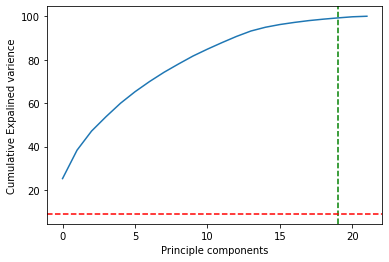

In [69]:
plt.ylabel('Cumulative Expalined varience')
plt.xlabel('Principle components')
plt.axvline(x=k, color="g",linestyle="--")
plt.axhline(y=9, color="r",linestyle="--")

plt.plot(var_cumu)
plt.show()

Here the plot x axis contains principan components and y axis conatins cumulative expalined varience

# Modle Handling

In [71]:
x_train=temp.drop('Next_Tmax',axis=1)
y_train=temp.Next_Tmax

In [74]:
x_train=temp.drop('Next_Tmin',axis=1)
y_train=temp.Next_Tmin

In [75]:
x_train.head()

,station,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,1.0,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,...,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1
1,2.0,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,...,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5
2,3.0,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,...,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1
3,4.0,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,...,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7
4,5.0,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,...,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2


In [76]:
y_train.head()

0    21.2
1    22.5
2    23.9
3    24.3
4    22.5
Name: Next_Tmin, dtype: float64

In [77]:
x_train.shape

(7752, 21)

this x_train having 7752 rows and 21 columns

In [78]:
y_train.shape

(7752,)

this y train contains 7752 rows and no columns

# Regressor method

In [79]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [81]:
x= temp.drop(['Next_Tmax'],axis=1)
y=temp["Next_Tmax"]
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [82]:
x= temp.drop(['Next_Tmin'],axis=1)
y=temp["Next_Tmin"]
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [83]:
from sklearn.metrics import mean_squared_error
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)
    from sklearn.tree import DecisionTreeRegressor
    lm=DecisionTreeRegressor()
    lm.fit(x_train,y_train)
    y_pred=lm.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    print(rmse)

1.143430263804108
1.141938624268895
1.1568239946471506
1.168334834569943
1.1546809299025966
1.163763838816387
1.1326039062705648
1.1367687034400147
1.1605451766142476
1.1530004180046314
1.153439558770076
1.1501941974721281
1.1688952534094157
1.1682372727871888
1.1565018316541698
1.1373136076271895
1.1512901509787168
1.1514323658793015
1.1623255372058534
1.158607885677766
1.1590990935248542
1.1535680528834473
1.1452790545943417
1.1445017855076454
1.1650557309740375
1.1553124900184564
1.1536899707400132
1.1385549141203708
1.1493641722701151
1.1461012384246165
1.1575812978644298
1.1708001079900192
1.1497908998548538
1.1448854362541014
1.1466439987256547
1.160926798788402
1.1627014720066517
1.1594419098280735
1.1409377564529712
1.1430286318425489
1.147012675397684
1.1434224693189696
1.1453712883980227
1.148032344390713
1.1362871975850588
1.132350382453737
1.1508667118536493
1.1463701953382517
1.1523392299000463
1.150262473094633
1.149585513785079
1.1551509536947877
1.1639624824954384
1.146

In [84]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [85]:
y_pred = regressor.predict(x_test)
y_pred

array([19.3, 22.5, 23.6, ..., 16.6, 24.5, 20.4])

In [86]:
dt_accuracy = round(regressor.score(x_train,y_train)*100,2)
dt_accuracy

100.0

The accuarcy score for Decession Tree was 100

In [87]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [88]:
y_pred = regressor.predict(x_test)
y_pred

array([21.04897584, 22.14919145, 23.23384254, ..., 15.43338907,
       24.3630501 , 19.94174949])

In [89]:
lr_accuracy = round(regressor.score(x_train,y_train)*100,2)
lr_accuracy

83.25

The accracy score for Logistic regressor is 83.25

In [90]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [91]:
y_pred = regressor.predict(x_test)
y_pred

array([20.182, 22.735, 23.141, ..., 15.708, 24.676, 20.224])

In [93]:
raf_accuracy=round(regressor.score(x_train,y_train)*100,2)
raf_accuracy

98.63

The accuracy score for RandomForest regressor is 98.63

In [94]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(x_train,y_train)

SVR()

In [95]:
y_pred = regressor.predict(x_test)
y_pred

array([23.28725887, 22.927681  , 23.2232476 , ..., 21.87148628,
       23.34522483, 23.16222157])

In [96]:
svr_accuracy=round(regressor.score(x_train,y_train)*100,2)
svr_accuracy

14.83

The accuracy score for Svr is 14.89

In [97]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(x_train,y_train)

KNeighborsRegressor()

In [98]:
y_pred = regressor.predict(x_test)
y_pred

array([23.2 , 21.86, 23.02, ..., 20.44, 24.32, 22.24])

In [99]:
kn_accuracy=round(regressor.score(x_train,y_train)*100,2)
kn_accuracy

68.2

The accuracy score for kNeighbor is 68.2

# Cross value correction

In [100]:
from sklearn.model_selection import cross_val_score

In [101]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.6057667878470518


In [102]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.7850068742341604


In [103]:
from sklearn.svm import SVR
regressor = SVR()
print(cross_val_score(regressor,x,y,cv=5).mean())

-0.062113059148852054


In [104]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.7684323004127811


In [105]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.023073744260458717


So by above cross validation report values are as follows: 

a) Decession Tree Regressor is 60.57

b) Random Forest Regressor is 78.5

c) Support Machine Vector Regreesor is -0.62

d) Linear Regression is 76.84

e) KNeighbor Regressor is 0.23

# Hyperparameter tunning

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
parameter = {"max_depth":[1,3,5,7,9,11,12],
             'criterion':['mse','friedman_mse']}

In [108]:
GCV = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [109]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12]})

In [110]:
GCV.best_params_

{'criterion': 'friedman_mse', 'max_depth': 9}

# The Final Model

In [111]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)
Final_mod = DecisionTreeRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
print((regressor.score(x_test,y_test)*100))

77.30110630290537


# Saving The Model

In [112]:
import joblib
joblib.dump(Final_mod,"FinalModle.pkl")

['FinalModle.pkl']

# Prediction Method

In [113]:
Final_mod = DecisionTreeRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
preds = regressor.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[20.1        22.4        22.6        22.2        23.2        26.5
 22.93222006 23.6        22.8        20.5        24.3        24.8
 22.9        24.8        23.8        24.         22.6        20.9
 23.3        16.7        20.8        26.9        26.4        21.7
 23.8        20.5        22.5        22.93222006 24.3        26.2
 22.9        21.6        27.4        22.9        23.3        21.3       ]
[19.7 22.4 23.8 21.3 23.5 26.1 22.4 23.  24.1 22.5 23.2 26.4 20.7 24.5
 24.  25.7 23.5 19.9 24.5 18.3 21.7 26.5 27.1 19.  21.7 19.5 24.6 23.3
 25.3 26.7 24.6 21.6 27.2 23.  25.1 20.9]
